In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Učitavanje i prikaz skupa podataka

In [2]:
df = pd.read_csv('dataset.csv')
df.head(n=8)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Contactless,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0.0,...,437.63,3.0,Amex,65.0,883.17,Biometric,0.8494,NaN,0.0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0.0,...,478.76,4.0,Mastercard,186.0,2203.36,Password,0.0959,NaN,0.0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0.0,...,50.01,4.0,Visa,226.0,1909.29,Biometric,0.8400,NaN,0.0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0.0,...,182.48,4.0,Visa,76.0,1311.86,OTP,0.7935,NaN,0.0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0.0,...,328.69,4.0,Mastercard,140.0,966.98,Password,0.3819,NaN,1.0,1
5,TXN_42724,USER_6852,168.55,Online,2023-06-05 20:55:00,33236.94,Laptop,Tokyo,Restaurants,0.0,...,226.85,2.0,Discover,51.0,1725.64,OTP,0.0504,NaN,0.0,0
6,TXN_10822,USER_5052,3.79,POS,2023-11-07 01:18:00,86834.18,Tablet,London,Restaurants,0.0,...,298.35,2.0,Mastercard,168.0,3757.19,Password,0.0875,NaN,0.0,0
7,TXN_49498,USER_4660,7.08,ATM Withdrawal,2023-02-25 03:43:00,45826.27,Tablet,London,Restaurants,0.0,...,164.38,4.0,Discover,182.0,1764.66,Biometric,0.5326,NaN,0.0,1


## Dimenzionalnost skupa podataka

In [3]:
number_of_samples = df.shape[0]
number_of_features = df.shape[1]
print('Broj uzoraka:', number_of_samples)
print('Broj varijabli:', number_of_features)

Broj uzoraka: 50012
Broj varijabli: 22


### Broj jedinstvenih korisnika u skupu podataka

In [4]:
unique_users = df.groupby('User_ID')['User_ID'].nunique()
len(unique_users)

8964

## Nedostajuće vrijednosti

### Broj nedostajućih vrijednosti za svaku varijablu

In [5]:
df.isna().sum()

Transaction_ID                      0
User_ID                             0
Transaction_Amount                  9
Transaction_Type                    9
Timestamp                           0
Account_Balance                     9
Device_Type                         9
Location                            9
Merchant_Category                   9
IP_Address_Flag                     9
Previous_Fraudulent_Activity        9
Daily_Transaction_Count             9
Avg_Transaction_Amount_7d           9
Failed_Transaction_Count_7d         9
Card_Type                           9
Card_Age                            9
Transaction_Distance                9
Authentication_Method               9
Risk_Score                          9
Is_Contactless                  49012
Is_Weekend                          9
Fraud_Label                         0
dtype: int64

### Rješavanje problema nedostajućih vrijednosti

Varijabla "Is_Contactless" ima 49012 nedostajućih vrijednosti što je 98%. No, njenu vrijednost možemo
pretpostaviti na temelju varijable "Transaction_Type". Ako je vrijednost te varijable "POS", "Bank Transfer" ili "Online" varijabla "Is_Contactless" ima vrijednost "True", a ako je vrijednost varijable
"Transaction_Type"="ATM Withdrawal" onda je vrijednost varijable "Is_Contactless"="False".

In [6]:
contactless_payment_methods = ['POS', 'Bank Transfer', 'Online']
df.loc[df.loc[:, 'Transaction_Type'].isin(contactless_payment_methods), 'Is_Contactless'] = True
df.loc[df.loc[:, 'Transaction_Type'] == 'ATM Withdrawal', 'Is_Contactless'] = False

Pregled skupa podataka pokazuje da retci s značajkom "User_ID"="USER_0007" imaju nedostajuće vrijednosti
za sve varijable osim "Transaction_ID", "Timestamp". Stoga, zbog prevelikog nedostatka podataka za te retke izbacivanje je najbolja opcija. 

In [7]:
df = df[df['User_ID'] != 'USER_0007']
df.isna().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Contactless                  0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

### Dimenzionalnost skupa podataka nakon uklanjanja nedostajućih vrijednosti

In [8]:
number_of_samples = df.shape[0]
number_of_features = df.shape[1]
print('Broj uzoraka:', number_of_samples)
print('Broj varijabli:', number_of_features)

Broj uzoraka: 50003
Broj varijabli: 22


## Duplikati

In [9]:
df = df.drop_duplicates(subset=['Transaction_ID'])
number_of_samples = df.shape[0]
print('Broj uzoraka nakon uklanjanja duplikata:', number_of_samples)

Broj uzoraka nakon uklanjanja duplikata: 50003


Broj uzoraka prije i nakon uklanjanja duplikata je jednak, stoga nema duplikata.

## Validacija, prikaz distribucije i vizualizacija skupa podataka

In [10]:
def visualise_pie_and_barchart(data_pie, pie_chart_title, data_barchart):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].pie(data_pie, labels = data_pie.index, autopct='%1.1f%%')
    ax[0].title.set_text(pie_chart_title)

    data_barchart.plot(kind='bar', ax=ax[1], color=['green', 'red'])
    ax[1].title.set_text("Bar Chart of number of non fraud and fraud transactions")
    ax[1].legend(loc='best')

    plt.show()
    
def visualise_histogram(column, bins):
    plt.hist(df[column], bins=bins)
    plt.title('Histogram of {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Number of transactions')
    plt.show()

### Transaction_ID

Varijablu nema potrebe vizualizirati i pokazati distribuciju zbog toga što je ona jedinstvena za svaku
transakciju te predstavlja zapravo identifikator transakcije.

### User_ID

Varijablu nema potrebe vizualizirati i pokazati distribuciju zbog toga što ona predstavlja identifikator
pojedinoga korisnika.

### Transaction Amount

#### Negativan iznos transakcija

In [11]:
negative_transactions = df.loc[df.Transaction_Amount < 0, :]
print('Broj primjera s negativim iznosom transakcije: ', len(negative_transactions))

Broj primjera s negativim iznosom transakcije:  3


Zbog malog broja primjera moguće ih je ukloniti ili je moguće ispraviti u pozitivne pod pretpostavkom
da je došlo do pogreške pri unosu. Upotrebljen je ispravak negativnih vrijednosti u pozitivne.

In [12]:
df.loc[df.Transaction_Amount < 0, 'Transaction_Amount'] = -df.Transaction_Amount

#### Transakcije s iznosom 0

In [13]:
zero_transactions = df.loc[df.Transaction_Amount == 0, :] 
print('Broj primjera s iznosom transakcije 0: ', len(zero_transactions))

Broj primjera s iznosom transakcije 0:  2


Takve transakcije se uklanjaju jer one zapravo nisu transakcije.

In [14]:
df = df.loc[df['Transaction_Amount'] != 0, :]

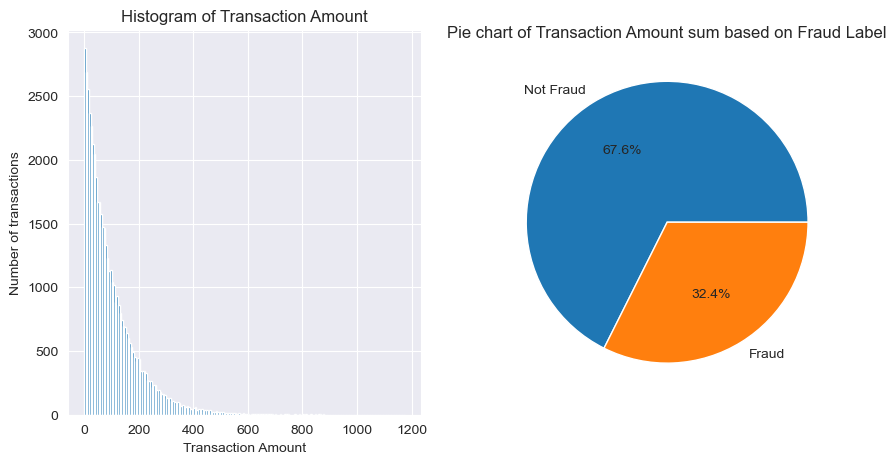

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(df['Transaction_Amount'], bins=200)
ax[0].set_title('Histogram of Transaction Amount')
ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('Number of transactions')

amount_frauds = df.groupby('Fraud_Label')['Transaction_Amount'].sum()
ax[1].pie(amount_frauds, labels = ['Not Fraud', 'Fraud'], autopct='%1.1f%%')
ax[1].title.set_text('Pie chart of Transaction Amount sum based on Fraud Label')

plt.show()

### Transaction Type

In [16]:
type_count = df.groupby('Transaction_Type').size()
type_count

Transaction_Type
ATM Withdrawal    12453
Bank Transfer     12452
Online            12546
POS               12550
dtype: int64

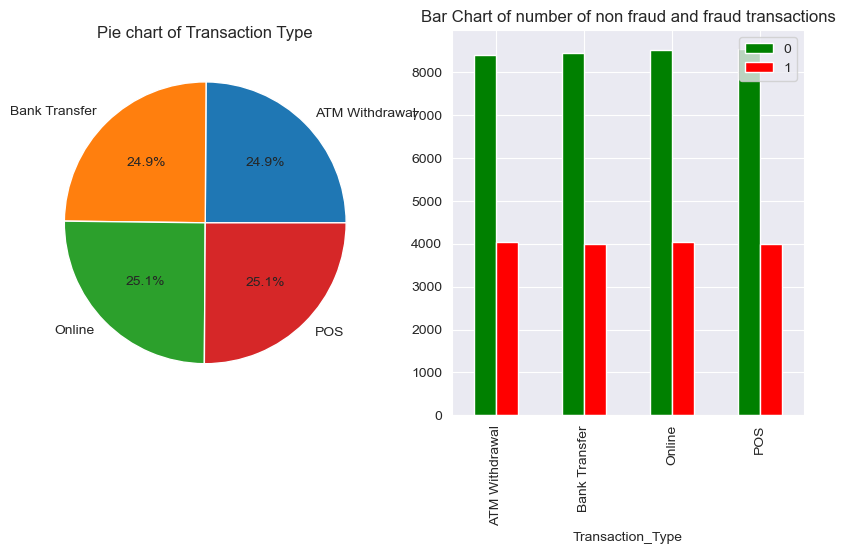

In [17]:
type_fraud_count = df.groupby(['Transaction_Type', 'Fraud_Label']).size().unstack()
visualise_pie_and_barchart(type_count, "Pie chart of Transaction Type", type_fraud_count)

### Timestamp

Prvo provjeravamo ima li varijabla "Is_Weekend" točne vrijednosti.

In [18]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
incorrect_is_weekend_count = sum((df['Timestamp'].dt.dayofweek >= 5) != df['Is_Weekend'])
incorrect_is_weekend_count

20757

Velik broj zapisa ima netočnu vrijednost varijable "Is_Weekend", stoga to moramo popraviti.

In [19]:
#df['Is_Weekend'] = df["Timestamp"].dt.dayofweek >= 5

### Account Balance

In [20]:
negative_balance = df.loc[df.Account_Balance < 0, :]
print('Broj primjera s negativnim iznosom na računu: ', len(negative_balance))

Broj primjera s negativnim iznosom na računu:  0


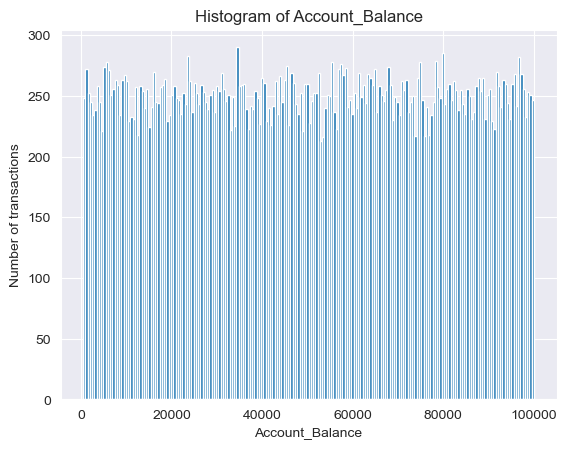

In [21]:
visualise_histogram('Account_Balance', 200)

### Device Type

In [22]:
devices_count = df.groupby('Device_Type').size()
devices_count

Device_Type
Laptop    16581
Mobile    16639
Tablet    16781
dtype: int64

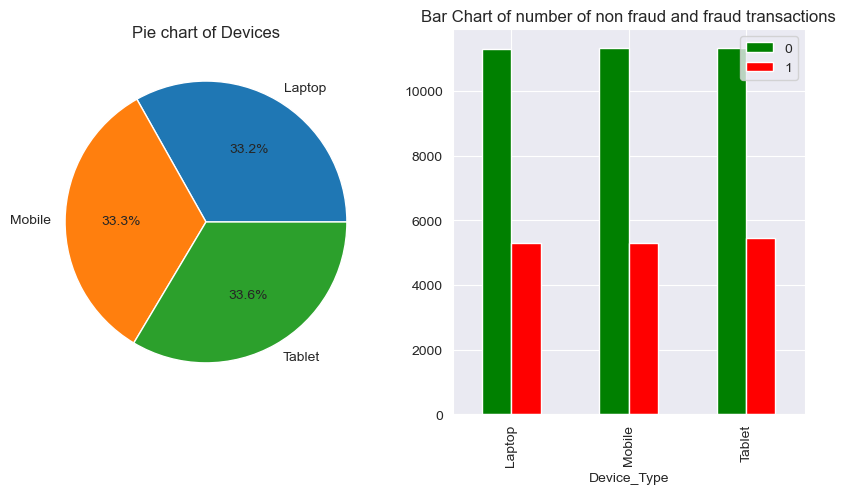

In [23]:
device_fraud_count = df.groupby(['Device_Type', 'Fraud_Label']).size().unstack()
visualise_pie_and_barchart(devices_count, "Pie chart of Devices", device_fraud_count)

Svi uređaji su ispravno napisani te nije potrebna ispravka.

### Location

In [24]:
df.groupby('Location').size()

Location
Lndn           21
London       9926
Mumbai       9994
New York     9915
Sydney       9938
Tokyo       10207
dtype: int64

Lokacija "Lndn" se misli na "London" stoga radimo zamijenu te vrijednosti.

In [25]:
df.loc[df.Location == 'Lndn', 'Location'] = 'London'

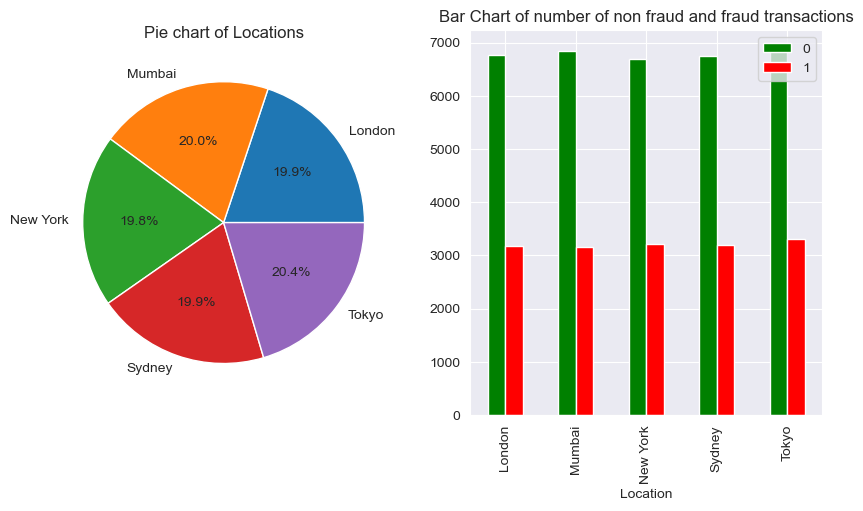

In [26]:
locations_count = df.groupby('Location').size()
location_fraud_count = df.groupby(['Location', 'Fraud_Label']).size().unstack()
visualise_pie_and_barchart(locations_count, "Pie chart of Locations", location_fraud_count)

### Merchant Category

In [27]:
df.groupby('Merchant_Category').size()

Merchant_Category
Clothing       10034
Electronics     9956
Electronis         1
Groceries      10018
Restaurants     9975
Travel         10017
dtype: int64

Kategorija trgovine "Electronis" se misli na "Electronics" stoga radimo zamijenu vrijednosti.

In [28]:
df.loc[df.Merchant_Category == 'Electronis', 'Merchant_Category'] = 'Electronics'

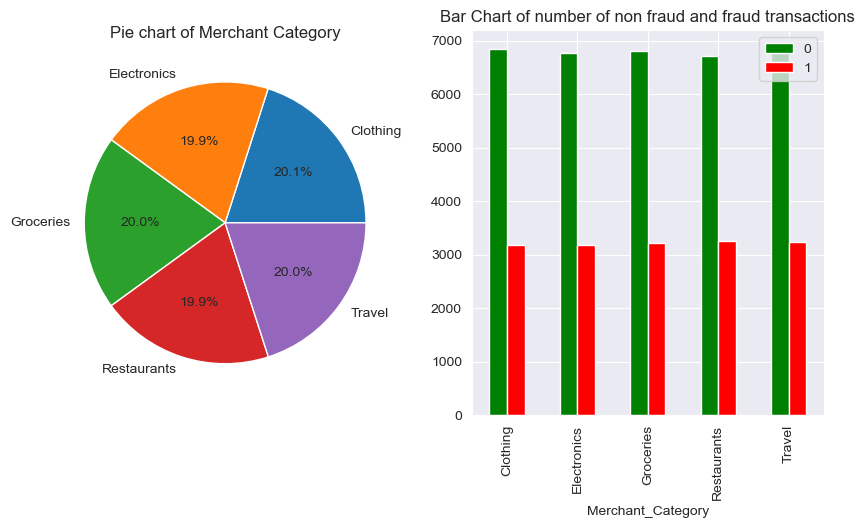

In [29]:
merchant_count = df.groupby('Merchant_Category').size()
merchant_fraud_count = df.groupby(['Merchant_Category', 'Fraud_Label']).size().unstack()
visualise_pie_and_barchart(merchant_count, "Pie chart of Merchant Category", merchant_fraud_count)

### Ip Address Flag

In [30]:
ip_address_count = df.groupby('IP_Address_Flag').size()
ip_address_count

IP_Address_Flag
0.0    47491
1.0     2510
dtype: int64

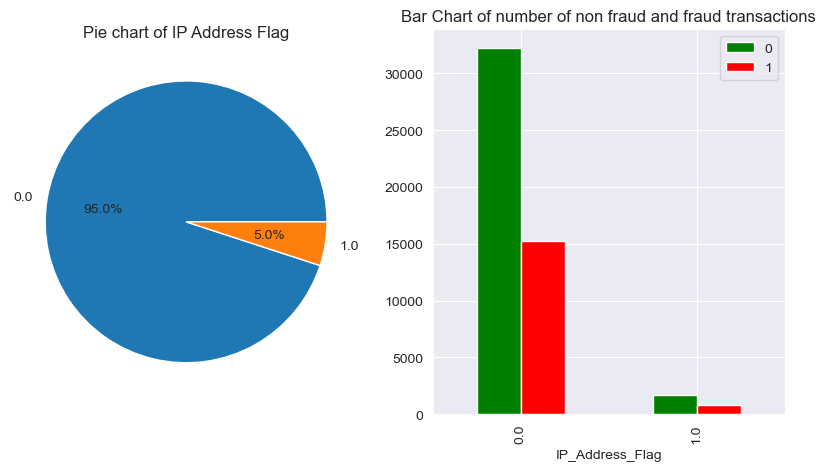

In [31]:
ip_address_fraud_count = df.groupby(['IP_Address_Flag', 'Fraud_Label']).size().unstack()
visualise_pie_and_barchart(ip_address_count, "Pie chart of IP Address Flag", ip_address_fraud_count)

### Previous_Fraudulent Activity

In [32]:
fraudulent_count = df.groupby('Previous_Fraudulent_Activity').size()
fraudulent_count

Previous_Fraudulent_Activity
0.0    45081
1.0     4920
dtype: int64

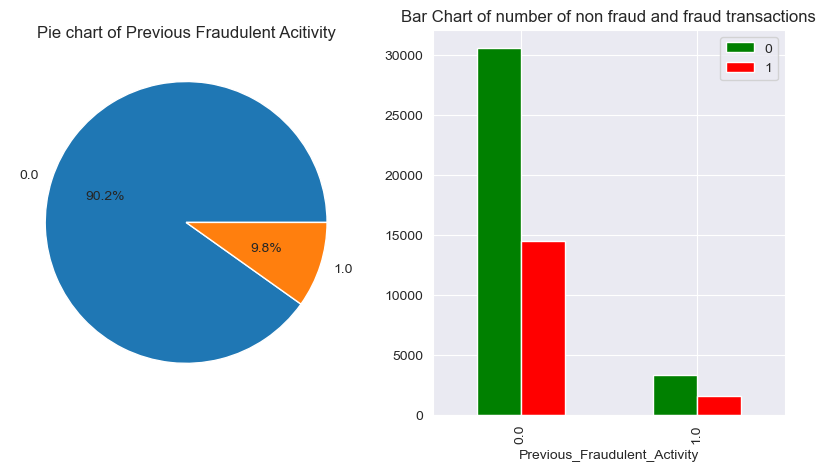

In [33]:
fraudulent_fraud_count = df.groupby(['Previous_Fraudulent_Activity', 'Fraud_Label']).size().unstack()
visualise_pie_and_barchart(fraudulent_count, "Pie chart of Previous Fraudulent Acitivity", fraudulent_fraud_count)

### Daily Transaction Count

In [34]:
negative_transaction_count = df.loc[df.Daily_Transaction_Count < 0, :]
print('Broj primjera s negativnim brojem transakcija u danu: ', len(negative_transaction_count))

Broj primjera s negativnim brojem transakcija u danu:  0


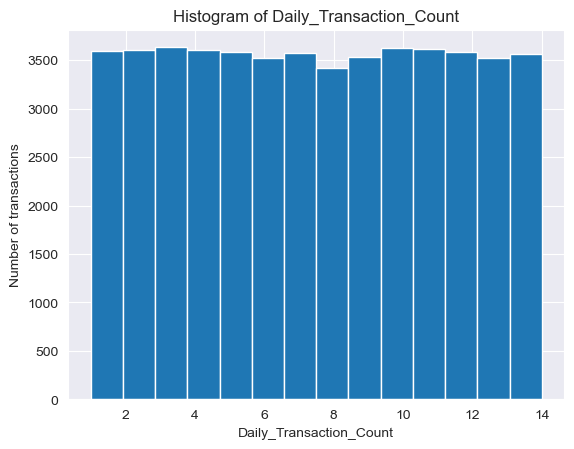

In [35]:
visualise_histogram('Daily_Transaction_Count', 14)

### Avg Transaction Amount 7d

In [36]:
negative_transaction_amount = df.loc[df.Avg_Transaction_Amount_7d < 0, :]
print('Broj primjera s negativnim brojem prosječnim iznosom transakcija u danu: ', len(negative_transaction_amount))

Broj primjera s negativnim brojem prosječnim iznosom transakcija u danu:  0


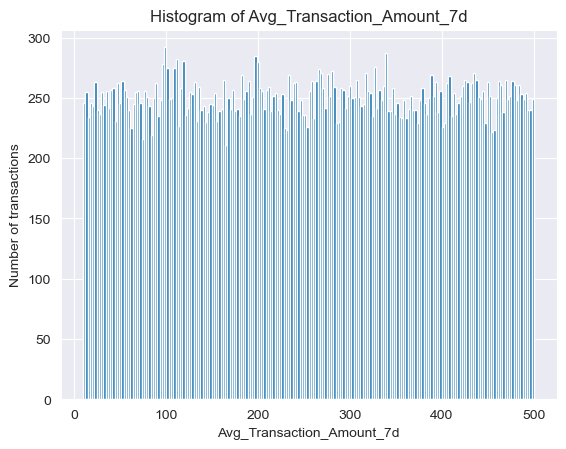

In [37]:
visualise_histogram('Avg_Transaction_Amount_7d', 200)

### Failed Transaction Count 7d

In [38]:
negative_failed_amount = df.loc[df.Failed_Transaction_Count_7d < 0, :]
print('Broj primjera s negativnim brojem neuspjelih transakcija u danu: ', len(negative_failed_amount))

Broj primjera s negativnim brojem neuspjelih transakcija u danu:  0


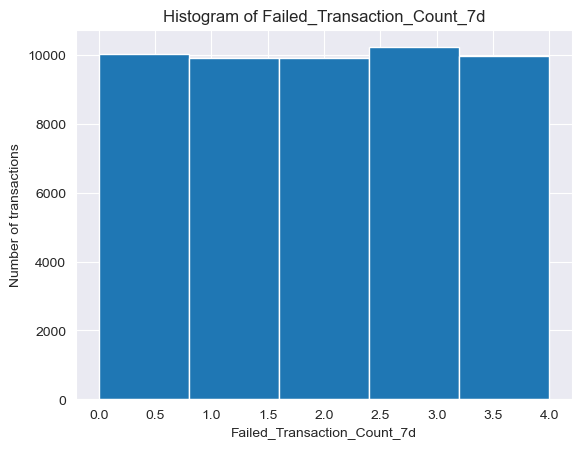

In [39]:
visualise_histogram('Failed_Transaction_Count_7d', 5)

### Card Type

In [40]:
card_count = df.groupby('Card_Type').size()
card_count

Card_Type
Amex          12422
Discover      12326
Mastercard    12693
Visa          12560
dtype: int64

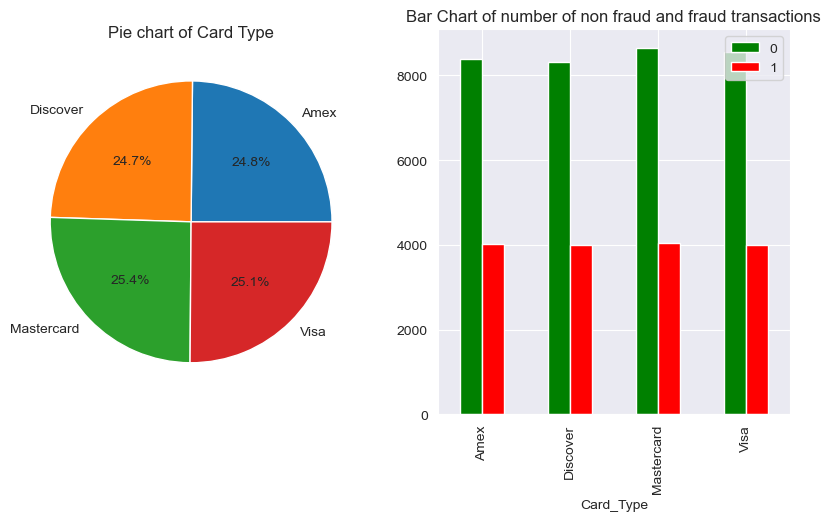

In [41]:
card_fraud_count = df.groupby(['Card_Type', 'Fraud_Label']).size().unstack()
visualise_pie_and_barchart(card_count, "Pie chart of Card Type", card_fraud_count)

### Card_Age

In [42]:
negative_card_age = df.loc[df.Card_Age < 0, :]
print('Broj primjera s negativnom starosti kartice: ', len(negative_card_age))

Broj primjera s negativnom starosti kartice:  0


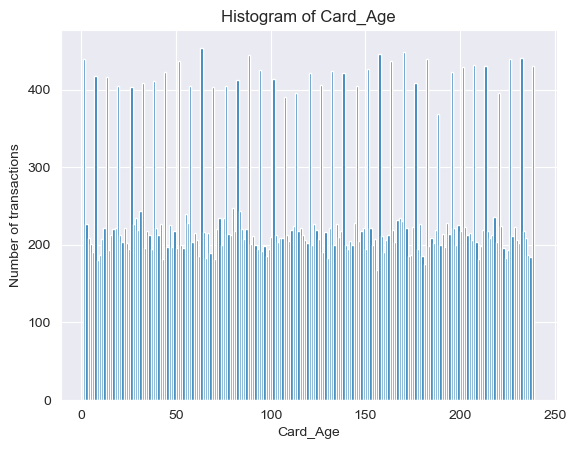

In [43]:
visualise_histogram('Card_Age', 200)

### Transaction Distance

In [44]:
negative_transaction_distance = df.loc[df.Transaction_Distance < 0, :]
print('Broj primjera s negativnom transakcijskom udaljenosti: ', len(negative_transaction_distance))

Broj primjera s negativnom transakcijskom udaljenosti:  0


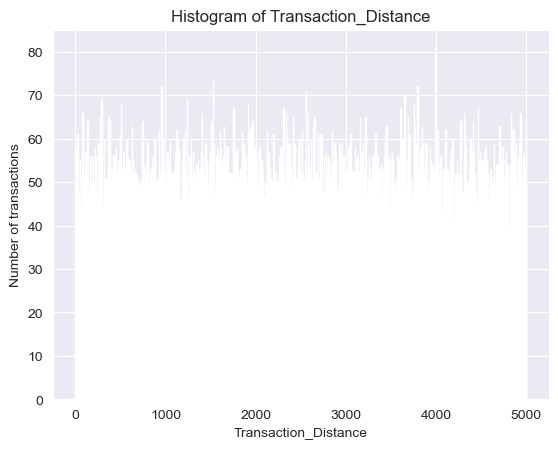

In [45]:
visualise_histogram('Transaction_Distance', 1000)

### Authentication Method

In [46]:
method_count = df.groupby('Authentication_Method').size()
method_count

Authentication_Method
Biometric    12593
OTP          12366
PIN          12586
Password     12456
dtype: int64

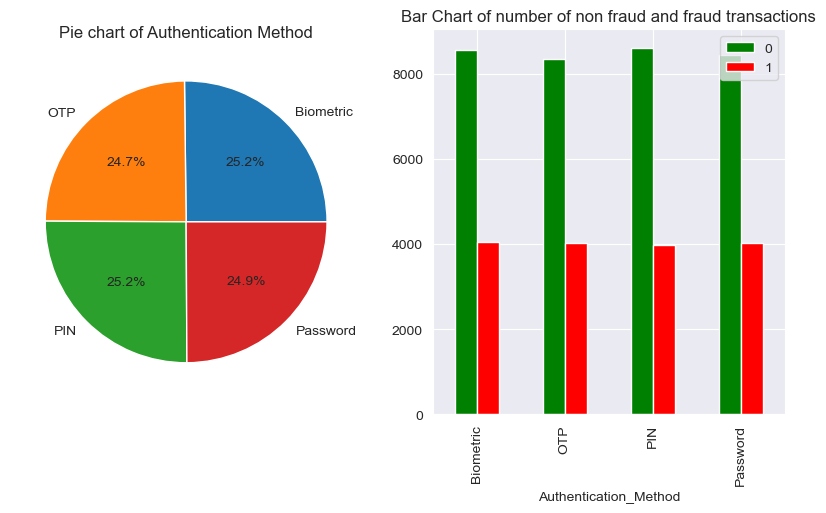

In [47]:
method_fraud_count = df.groupby(['Authentication_Method', 'Fraud_Label']).size().unstack()
visualise_pie_and_barchart(method_count, "Pie chart of Authentication Method", method_fraud_count)

### Risk Score

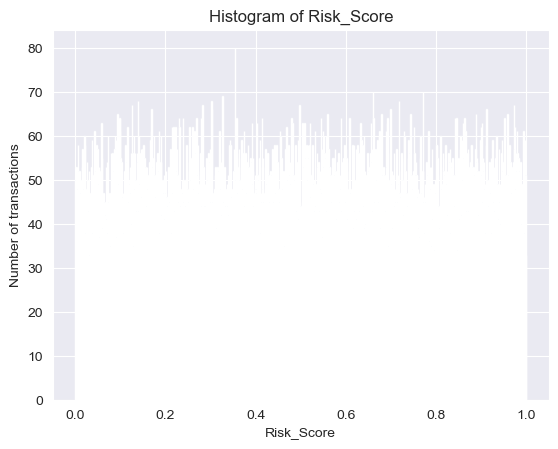

In [48]:
visualise_histogram('Risk_Score', 1000)

### Is Contactless

In [49]:
contactless_count = df.groupby('Is_Contactless').size()
contactless_count

Is_Contactless
False    12453
True     37548
dtype: int64

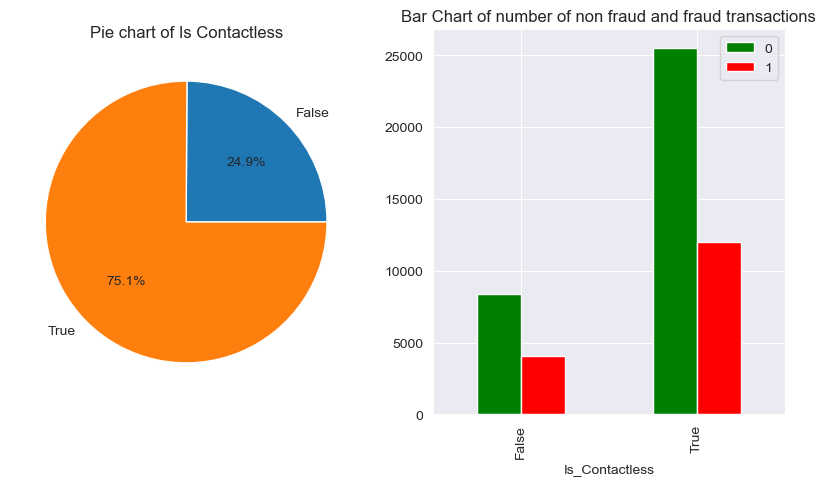

In [50]:
contactless_fraud_count = df.groupby(['Is_Contactless', 'Fraud_Label']).size().unstack()
visualise_pie_and_barchart(contactless_count, "Pie chart of Is Contactless", contactless_fraud_count)

### Is Weekend

In [51]:
weekend_count = df.groupby('Is_Weekend').size()
weekend_count

Is_Weekend
0.0    35019
1.0    14982
dtype: int64

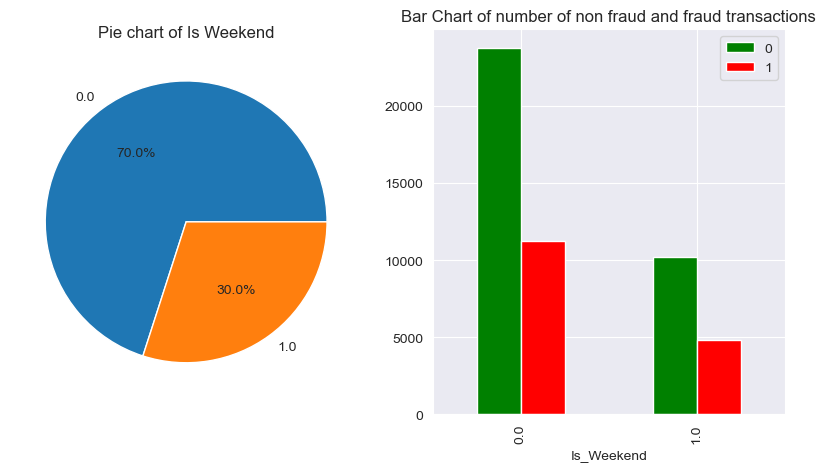

In [52]:
weekend_fraud_count = df.groupby(['Is_Weekend', 'Fraud_Label']).size().unstack()
visualise_pie_and_barchart(weekend_count, "Pie chart of Is Weekend", weekend_fraud_count)

## Oznaka -  Fraud Label

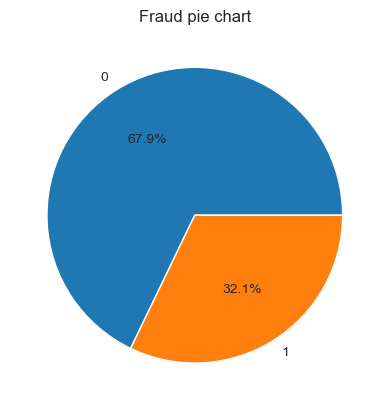

In [53]:
fraud_count = df.groupby('Fraud_Label').size()
plt.pie(fraud_count, labels=fraud_count.index, autopct='%1.1f%%')
plt.title('Fraud pie chart')
plt.show()

### Broj uzoraka nakon validacije skupa podataka

In [54]:
df.shape[0]

50001

### Dodatne vizualizacije

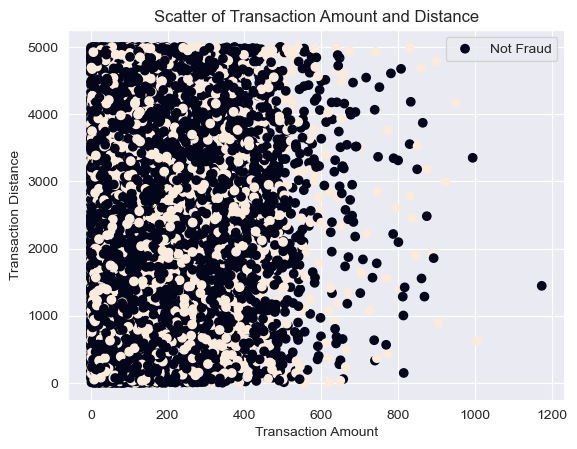

In [55]:
plt.scatter(df['Transaction_Amount'], df['Transaction_Distance'], c=df['Fraud_Label'])
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Distance')
plt.title('Scatter of Transaction Amount and Distance')
plt.legend(['Not Fraud'], loc='upper right')
plt.show()

#### Korelacijska matrica

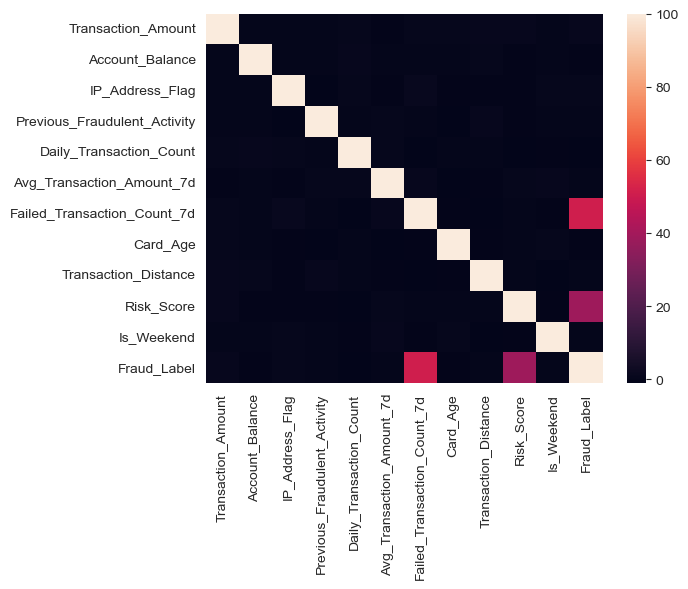

In [56]:
import seaborn as sns

correlations = df.corr(numeric_only=True) * 100
sns.heatmap(correlations)
plt.show()

## Dan s najvećim iznosom prevara

In [57]:
frauds = df[df['Fraud_Label'] == 1].copy()
frauds['Date'] = frauds['Timestamp'].dt.date
frauds_amount_per_day = frauds.groupby('Date')['Transaction_Amount'].sum()
max_frauds_date = frauds_amount_per_day.idxmax()
print('Datum s najvećim iznosom prevara:', max_frauds_date)
print('Ukupan iznos prevara {}: {}'.format(max_frauds_date, frauds_amount_per_day.max()))

Datum s najvećim iznosom prevara: 2023-11-24
Ukupan iznos prevara 2023-11-24: 10884.44


24.11.2023. je dan sa najvećim iznosom prevara zbog toga što je taj dan bio crni petak, odnosno
taj dan su prevaranti uspjeli najviše prevariti ljude vjerojatno putem "phishing" poveznica jer su se ljudi
nadali velikim popustima. 

In [58]:
df.drop("Is_Contactless", axis=1, inplace=True)

In [59]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0.0,...,7.0,437.63,3.0,Amex,65.0,883.17,Biometric,0.8494,0.0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0.0,...,13.0,478.76,4.0,Mastercard,186.0,2203.36,Password,0.0959,0.0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0.0,...,14.0,50.01,4.0,Visa,226.0,1909.29,Biometric,0.8400,0.0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0.0,...,8.0,182.48,4.0,Visa,76.0,1311.86,OTP,0.7935,0.0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0.0,...,14.0,328.69,4.0,Mastercard,140.0,966.98,Password,0.3819,1.0,1


In [61]:
df.to_csv("data_cleaned.csv", index_label=False)